>#  HW4. 인구 구조 파이 그래프
학번: A70064, 이름: 안종민

목표: 사용자로부터 지역명을 입력받아 해당 지역의 남녀 인구 비율을 파이(`pie`) 차트로 시각화

데이터 출처: 행정안전부 주민등록인구통계 CSV (`population_by_gender.csv`)

시각화 도구: `Python`, `Matplotlib`

---
---

### 1. 환경 설정 & 드라이브 마운트

- 라이브러리 임포트, 한글 폰트 설치 및 캐시 갱신, Colab 드라이브 마운트 등을 실행합니다.

In [ ]:
from google.colab import drive
import csv
import os
import matplotlib.pyplot as plt

# 한글 폰트 설치 & 캐시 갱신
# 시스템에 나눔글꼴 설치 (fonts-nanum)
!apt-get install fonts-nanum -qq
# 새로 설치된 폰트를 Matplotlib 등에서 인식하도록 캐시 갱신
!fc-cache -fv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

drive.mount('./gdrive', force_remount=True)
print(os.getcwd())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

### 2. 데이터 로드

- `population_by_gender.csv` 파일을 열고 헤더를 건너뛴 뒤, 리스트로 변환합니다.
- 인코딩 확인: CSV 파일이 `CP949(euc-kr)` 인코딩일 경우 `encoding='cp949'` 지정

In [ ]:
f = open('./gdrive/MyDrive/Colab Notebooks/ch5_population/population_by_gender.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)  # 첫 줄은 헤더이므로 건너뛰기

### 3. 사용자 입력 및 데이터 추출

- 사용자 입력을 받아 해당 지역의 데이터를 검색합니다.
- `target` 행에서 남성과 여성 인구수를 합산하여 전체 인구 대비 비율(%)을 계산합니다.

In [ ]:
# 사용자로부터 지역명 입력
region = input("인구 구조를 알고 싶은 지역명(예: 제주특별자치도)을 입력하세요: ").strip()

# 해당 지역 데이터 찾기
for row in data:
    if region in row[0]:
        target = row
        break
else:
    raise ValueError(f"'{region}' 데이터를 찾을 수 없습니다.")

# 남, 여 인구수 합계 계산
# 남성 데이터: 인덱스 3~103, 정수로 변환
male_nums = [int(x.replace(',', '')) for x in target[3:104]]
male_total = sum(male_nums)
# 여성 데이터(저장1 방식): 뒤집어서 0~100세 순, 정수로 변환
female_slice = target[-1:-102:-1]
female_slice.reverse()
female_nums = [int(x.replace(',', '')) for x in female_slice]
female_total = sum(female_nums)

인구 구조를 알고 싶은 지역명(예: 제주특별자치도)을 입력하세요: 제주


### 4. 시각화 설정 및 그래프 출력

- 폰트를 `Matplotlib`에 등록하고, 스타일 및 그래프 크기를 설정합니다.
- `plt.pie()` 로 비율 차트 생성, 색상 및 소수점 포맷 적용
- `autopct` 로 비율에 소수점 표시, `colors` 리스트로 색상 지정
- `axis('equal')` 로 원 비율 유지

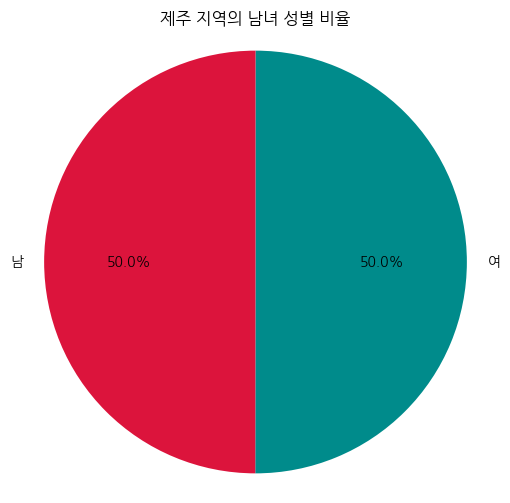

In [ ]:
# 폰트 파일 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# 폰트를 Matplotlib 전역에 추가
fm.fontManager.addfont(font_path)
# 폰트 내부 이름 확인 (optional)
font_prop = fm.FontProperties(fname=font_path)
# rcParams 에서 이 이름을 기본 폰트로 설정
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 파이 차트
labels = ['여', '남']
sizes  = [female_total, male_total]
colors = ['darkcyan', 'crimson']
explode = (0, 0)  # 강조 없음

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    counterclock=False
)
plt.title(f"{region} 지역의 남녀 성별 비율")
plt.axis('equal')
plt.show()